**CS 422 Project Report - Amrutham Lakshmi Himaja**


> **Abstract**


*   This project lets to know how to perform different models on the dataset.From this project I learnt how a multi class classification can be broken down into binary classification and I also reasearched alot about the tools and pipelines.One more insight which i got from this project is that model being complex is not alone necessary it has to be a perfect fit.Working on a industrial level dataset gave a lot of insights on how class embalances and can be generalized.




> **Overview**


*   Problem statement: The objective of this project is to build a model that generalizes well out of sample. 

*   Proposed methodology: The data is  scaled and principal component analysis (PCA) is performed on it. The final classifier uses a decision tree classifier.






In [ ]:
!pip install sklearn2pmml

     |████████████████████████████████| 5.9MB 9.0MB/s 
  Created wheel for sklearn2pmml: filename=sklearn2pmml-0.71.1-cp37-none-any.whl size=5900699 sha256=fb73af65b6a8fa74a331cb9569f2fd48165f95cfa93234245bdf0212a7fde00b
  Stored in directory: /root/.cache/pip/wheels/69/90/10/0eec92654638f1f05d1b21b1d4a715a257774629e990d6fc6a
Successfully built sklearn2pmml


In [ ]:
!pip install skl2onnx
!pip install onnxruntime

     |████████████████████████████████| 235kB 7.4MB/s 
     |████████████████████████████████| 12.2MB 269kB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
     |████████████████████████████████| 4.1MB 8.5MB/s 


In [ ]:
!pip install git+https://github.com/WillKoehrsen/feature-selector

  Cloning https://github.com/WillKoehrsen/feature-selector to /tmp/pip-req-build-gzeuh78l
  Running command git clone -q https://github.com/WillKoehrsen/feature-selector /tmp/pip-req-build-gzeuh78l
  Created wheel for feature-selector: filename=feature_selector-N_A-cp37-none-any.whl size=20720 sha256=94e045ff3f8291795aad73ceaa3d15950dc9acb617f6e1f7b6d569497b248045
  Stored in directory: /tmp/pip-ephem-wheel-cache-xvavguwt/wheels/81/0a/7b/dd7507a30060105885e61fbc6f724e00c36a9668656de6745a
Successfully built feature-selector


In [ ]:
from google.colab import drive
import time
from feature_selector import FeatureSelector
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_classification 
import graphviz
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate 
from mlxtend.feature_selection import ColumnSelector
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
import datetime
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.compose import ColumnTransformer
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn

import onnxruntime as rt

from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import os
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import tree
import graphviz
from sklearn_pandas import DataFrameMapper 
from sklearn import decomposition
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_selection import SelectKBest 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn2pmml.decoration import ContinuousDomain
from sklearn2pmml.pipeline import PMMLPipeline 
from sklearn2pmml import sklearn2pmml
from sklearn.externals.six import StringIO 
from IPython.display import Image
from sklearn import tree
import sklearn.datasets as datasets
from sklearn.tree import export_graphviz
import graphviz
import math

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
pmml_df = pd.read_csv("/content/drive/My Drive/data_public.csv.gz", compression='gzip',header=0,sep=',', quotechar='"')
pmml_df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,2
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,3
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,2
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3


In [ ]:
print(len(pmml_df))
print(pmml_df.shape)

1200000
(1200000, 16)


In [ ]:
P = pd.DataFrame(data=pmml_df.drop('Class', axis=1))
P.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663


In [ ]:
training_labels = list(P.columns)
print(training_labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']


In [ ]:
q = pd.DataFrame(data=pmml_df['Class'])
q.head()

,Class
0,2
1,3
2,2
3,2
4,3


In [ ]:
P_train, P_test, q_train, q_test = train_test_split(P, q, test_size=0.20, random_state=97)

In [ ]:
training_data = pd.concat([P_train,q_train],axis=1)
training_data.head()
print(len(training_data))

960000


**Data Processing and Analysis**


> **Checking for Missing Values**

*   First, I checked for any missing values in the dataset.To Check for the missing values in the dataset there are many ways I choose isnull() method which helps me to find any null values present in the dataset.If yes it returns True or else False.





In [ ]:
# Check whether the dataframe contains any missing value
print(training_data.isnull().values.any())
print(len(training_data.columns))

False
16


No missing data was found.So it returned False.

**Principal Component Analysis**

*   Next I am performing principal components to find the optimal number of components in the entire datasets.Before performing PCA I scaled the entire dataset and then performed PCA with n_components on the scaled trained dataset with total number of features and generated a plot.





In [ ]:
standard_scalar = StandardScaler()
training_df_scaled = standard_scalar.fit_transform(training_data.drop('Class', axis=1))
training_df_scaled = pd.DataFrame(training_df_scaled, columns=training_labels)
print(len(training_df_scaled))
print(training_df_scaled.head(10))
print(training_df_scaled.isnull().values.any())

training_df_scaled = pd.merge(training_data['Class'],training_df_scaled, left_index=True, right_index=True, how='inner')
print(len(training_df_scaled))
print(training_df_scaled.head(10))
print(training_df_scaled.isnull().values.any())

960000
          A         B         C  ...         M         N         O
0  1.440950  0.765287  1.458101  ...  0.788554  1.398047  1.413347
1  1.317774  0.528108  1.321870  ...  1.066979  1.476711  1.263338
2 -0.663411  0.429147 -0.662361  ... -0.687958 -0.850573 -0.859964
3 -0.641023 -0.040729 -0.550038  ... -0.503728 -0.851243 -0.858986
4 -0.630074 -0.094215 -0.551774  ... -0.471425 -0.824783 -0.929646
5  1.458450  0.256821  1.356139  ...  1.518827  1.220957  1.347866
6 -0.846250 -1.936970 -1.091371  ... -0.052989 -0.284619  0.110404
7  1.383809  0.958845  1.446394  ...  1.417070  1.392328  1.423425
8 -0.855554 -2.160599 -1.045623  ... -0.315759 -0.284472  0.083560
9 -0.838952 -1.825808 -1.071149  ... -0.322718 -0.461967 -0.041303

[10 rows x 15 columns]
False
768010
        Class         A         B  ...         M         N         O
739135      3 -0.658611  0.228425  ... -0.734685 -0.857980 -0.941281
54118       3  1.356763  0.236029  ...  1.623599  1.415648  1.330797
293468      

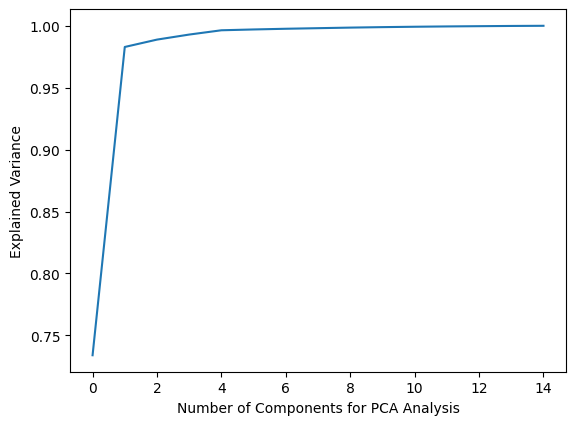

array([7.33972266e-01, 2.48933297e-01, 5.94149152e-03, 4.07366435e-03,
       3.46361345e-03, 6.57919941e-04, 5.61878608e-04, 4.72793000e-04,
       4.62247400e-04, 3.82487210e-04, 3.10561061e-04, 2.56399887e-04,
       2.01480639e-04, 1.84763545e-04, 1.25136075e-04])

In [ ]:
pca_n_comp = PCA(n_components=len(training_df_scaled.columns)-1)
pca_n_comp.fit(training_df_scaled.drop('Class', axis=1))
plt.plot(np.cumsum(pca_n_comp.explained_variance_ratio_))
plt.xlabel('Number of Components for PCA Analysis')
plt.ylabel('Explained Variance')
plt.show()
pca_n_comp.explained_variance_ratio_

The elbow in the above plot occurs at n = 1.So I used 1 principal component for all the pipelines.

In [ ]:
training_labels_str = ''.join(map(str, training_labels))
print(training_labels_str)

ABCDEFGHIJKLMNO


**Next**, I performed a PMML pipeline which includes Standard scaler,PCA and a Decision Tree Classifier.Fitted the pipeline with the p and q train.Calculated the score for the p and q test.

In [ ]:
#DecisionTreeClassifier
pipeline = PMMLPipeline([('scaler',StandardScaler()),('pca',PCA(n_components=1)),('classifier',DecisionTreeClassifier(max_depth=2))])
pipeline.fit(P_train,q_train)
print(pipeline.score(P_test,q_test)) f

0.49764166666666665


The Accuracy of the total dataset is 49.7%.

**Feature Removal**

> Checking the accuracy of the dataset by dropping each feature



In [ ]:
features = 'ABCDEFGHIJKLMNO'
for i in range(0, len(features)):
    pipeline = PMMLPipeline([('scaler',StandardScaler()),('pca',PCA(n_components=1)),('classifier',DecisionTreeClassifier(max_depth = 2))])
    pipeline.fit(training_data.drop([features[i:i+1]], axis=1),training_data['Class'])
    results = pipeline.predict(P_test)
    actual = np.concatenate(q_test.values)
    print("Dropped feature:", features[i:i+1], ", Accuracy:", metrics.accuracy_score(actual, results))

Dropped feature: A , Accuracy: 0.49764166666666665
Dropped feature: B , Accuracy: 0.49764166666666665
Dropped feature: C , Accuracy: 0.49764166666666665
Dropped feature: D , Accuracy: 0.49764166666666665
Dropped feature: E , Accuracy: 0.49764166666666665
Dropped feature: F , Accuracy: 0.49764166666666665
Dropped feature: G , Accuracy: 0.49764166666666665
Dropped feature: H , Accuracy: 0.49764166666666665
Dropped feature: I , Accuracy: 0.49764166666666665
Dropped feature: J , Accuracy: 0.49764166666666665
Dropped feature: K , Accuracy: 0.49764166666666665
Dropped feature: L , Accuracy: 0.49764166666666665
Dropped feature: M , Accuracy: 0.49764166666666665
Dropped feature: N , Accuracy: 0.49764166666666665
Dropped feature: O , Accuracy: 0.49764166666666665


After dropping the each feature in the dataset at once there is no change in the accuracy.We can even check accuracy by dropping two features

In [ ]:
to_drop = ['A','B']
pipeline0 = PMMLPipeline([('mapper',DataFrameMapper([(P_train.columns.drop(to_drop).values,[StandardScaler()])])),('pca',PCA(n_components=1)),('classifier',DecisionTreeClassifier(max_depth = 2))])
pipeline0.fit(training_data.drop(to_drop, axis=1),training_data['Class'])
results = pipeline0.predict(P_test.drop(to_drop, axis=1))
actual = np.concatenate(q_test.values)
print('Accuracy:', metrics.accuracy_score(actual, results))

Accuracy: 0.49764166666666665


By dropping two features from dataset there is no change in the accuracy.It is still 49.7% because of which no feature can be dropped neither can be selected as the best feature or the important feature out of 15.So I assume dropping the feature from the dataset doesnt make any sense based on the accuracy.I am gonna perform some more experiments to find the best features.

**Binary Classification**


*   Performing binary classification on the dataset because it is an another way to find three class classification.Choosing class 1 and checking for the accuracy versus classes which are not class 1.







In [ ]:
#For class 1 vs not 1
pmml_df_class1=pmml_df.copy(deep=True)
pmml_df_class1.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,2
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,3
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,2
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3


Considering only class 1 values and replacing class 2 and class 3 as 0.

In [ ]:
#Making class 2 and class 3 values as 0
pmml_df_class1.loc[(pmml_df_class1['Class']== 2)|(pmml_df_class1['Class']==3),'Class'] = 0
pmml_df_class1.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,0
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,0
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,0
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,0
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,0


In [ ]:
pmml_df_class1['Class'].unique()

array([0, 1])

In [ ]:
#Training the values
P_class1 = pd.DataFrame(data=pmml_df_class1.drop('Class', axis=1))
q_class1 = pd.DataFrame(data=pmml_df_class1['Class'],columns=['Class'])
P_class1_train, P_class1_test, q_class1_train, q_class1_test = train_test_split(P_class1,q_class1,test_size=0.2)
train_data = pd.concat([P_class1_train,q_class1_train],axis=1)
train_data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
697976,-37.784934,-10.654496,12.896484,16.375475,-27.292293,-27.990642,3.313893,-27.026464,-8.025065,25.583653,-1.796284,0.731796,-56.772207,-1.849098,1.798296,0
124109,-32.882887,-8.463958,12.949734,21.512647,-30.915887,-21.083901,3.120177,-23.587813,-5.725813,22.436569,-1.822056,-0.427469,-54.274918,-9.308968,-3.153025,0
337632,-37.275441,-20.219862,12.339928,16.686933,-20.581779,-25.722242,2.674869,-30.666148,-12.963303,20.481545,1.390754,-1.752627,-54.971639,-11.854700,-2.299344,0
739151,-64.834974,-58.952422,-36.876284,-116.873617,-19.714555,-135.352202,-57.657791,-2.927923,59.075128,-89.025012,47.571344,-43.785613,-61.743673,32.411236,67.541313,0
1114969,-24.707871,-9.747992,4.354934,22.178446,-22.095645,-23.535415,5.105842,-31.780045,-6.791423,24.097556,3.446627,5.738025,-54.815660,-8.764139,-3.140459,0


In [ ]:
#DecisionTreeClassifier
pipeline1_DTC = PMMLPipeline([('scaler',StandardScaler()),('pca',PCA(n_components=1)),('classifier',DecisionTreeClassifier(max_depth=2))])
pipeline1_DTC.fit(P_class1_train,q_class1_train)
print(pipeline1_DTC.score(P_class1_test,q_class1_test))

0.8332541666666666


The accuracy for the class 1 versus not class 1(i.e., class 2 and class 3 considered as 0 class) is 83%.

In [ ]:
#RandomForestClassifier
pipeline1_RFC = PMMLPipeline([('scaler',StandardScaler()),('pca',PCA(n_components=1)),('classifier',RandomForestClassifier(max_depth=2))])
pipeline1_RFC.fit(P_class1_train,q_class1_train)
print(pipeline1_RFC.score(P_class1_test,q_class1_test))

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


0.8327375


The accuracy for the class 1 versus not class 1(i.e., class 2 and class 3 considered as 0 class) is 83%.

In [ ]:
features = 'ABCDEFGHIJKLMNO'
for i in range(0, len(features)):
    pipeline = PMMLPipeline([('scaler',StandardScaler()),('pca',PCA(n_components=1)),('classifier',DecisionTreeClassifier(max_depth = 3))])
    pipeline.fit(train_data.drop([features[i:i+1]], axis=1),train_data['Class'])
    results = pipeline.predict(P_class1_test)
    actual = np.concatenate(q_class1_test.values)
    print("Dropped feature:", features[i:i+1], ", Accuracy:", metrics.accuracy_score(actual, results))

Dropped feature: A , Accuracy: 0.8327125
Dropped feature: B , Accuracy: 0.8327125
Dropped feature: C , Accuracy: 0.8327125
Dropped feature: D , Accuracy: 0.8327125
Dropped feature: E , Accuracy: 0.8327125
Dropped feature: F , Accuracy: 0.8327125
Dropped feature: G , Accuracy: 0.8327125
Dropped feature: H , Accuracy: 0.8327125
Dropped feature: I , Accuracy: 0.8327125
Dropped feature: J , Accuracy: 0.8327125
Dropped feature: K , Accuracy: 0.8327125
Dropped feature: L , Accuracy: 0.8327125
Dropped feature: M , Accuracy: 0.8327125
Dropped feature: N , Accuracy: 0.8327125
Dropped feature: O , Accuracy: 0.8327125


By dropping each feature the accuracy also getting the same accuracy as 83%

Now considering the dataset with class 2 and 3 which are 0's.

In [ ]:
#Considering class which is not 1
pmml_df_class_not1=pd.DataFrame(data=pmml_df_class1[pmml_df_class1["Class"]==0])
pmml_df_class_not1.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,0
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,0
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,0
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,0
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,0


In [ ]:
P_class_not1 = pd.DataFrame(data=pmml_df_class_not1.drop('Class', axis=1))
q_class_not1 = pd.DataFrame(data=pmml_df_class_not1['Class'],columns=['Class'])
P_class_not1_train, P_class_not1_test, q_class_not1_train, q_class_not1_test = train_test_split(P_class_not1,q_class_not1,test_size=0.2)
train_data = pd.concat([P_class_not1_train,q_class_not1_train],axis=1)
train_data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
556753,-36.532190,-18.415576,13.933149,20.687396,-23.433974,-22.105896,2.726087,-23.643071,-9.895414,22.885605,4.150771,4.620460,-57.751576,-6.174930,2.036669,0
478801,236.302382,-13.434130,225.457638,-13.842231,138.902776,92.860630,154.281306,190.991452,79.179412,137.158980,198.471487,6.621253,-12.873982,157.511649,130.629736,0
911203,-29.944374,-20.631123,4.713876,19.780079,-28.114404,-19.559039,1.585056,-26.584901,-5.463758,26.882176,0.773907,-1.939820,-53.817089,-9.973169,1.054645,0
1130124,231.006474,-12.044842,212.464184,-12.269698,127.891824,93.639251,118.917273,215.732025,84.182746,127.126162,216.161233,-7.625471,-25.342553,125.707610,142.789328,0
340727,234.342600,-6.553826,218.764204,-15.853706,130.032273,72.301271,117.434405,208.071413,74.936292,148.914970,206.734727,3.847973,-16.760501,137.414333,146.689238,0


In [ ]:
#DecisionTreeClassifier
pipelinenot1_DTC = PMMLPipeline([('scaler',StandardScaler()),('pca',PCA(n_components=1)),('classifier',DecisionTreeClassifier(max_depth=2))])
pipelinenot1_DTC.fit(P_class_not1_train,q_class_not1_train)
print(pipelinenot1_DTC.score(P_class_not1_test,q_class_not1_test))

1.0


Accuracy is 100% for predicting the not class 1 i.e., predicting class 2 and class 3 

In [ ]:
#RandomForestClassifier
pipelinenot1_RFC = PMMLPipeline([('scaler',StandardScaler()),('pca',PCA(n_components=1)),('classifier',RandomForestClassifier(max_depth=2))])
pipelinenot1_RFC.fit(P_class_not1_train,q_class_not1_train)
print(pipelinenot1_RFC.score(P_class_not1_test,q_class_not1_test))

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


1.0


In [ ]:
pmml_df_class23=pmml_df.copy(deep=True)

Performing another experiment considering the dataset with only class 2 and class 3

In [ ]:
#DataFrame having only class 2 and class 3
pmml_df_class23=pd.DataFrame(data=pmml_df_class23[pmml_df_class23['Class'].isin([2,3])])
pmml_df_class23.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,2
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,3
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,2
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3


In [ ]:
P_class23 = pd.DataFrame(data=pmml_df_class23.drop('Class', axis=1))
q_class23 = pd.DataFrame(data=pmml_df_class23['Class'],columns=['Class'])
P_class23_train, P_class23_test, q_class23_train, q_class23_test = train_test_split(P_class23,q_class23,test_size=0.2)
train_data23 = pd.concat([P_class23_train,q_class23_train],axis=1)
train_data23.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
81617,-25.224550,-6.547884,7.472777,18.269460,-19.696754,-25.542844,4.911291,-27.035871,-8.190248,33.232783,1.973622,5.861936,-55.869548,-11.426786,1.874378,2
1160214,-58.540670,-43.411420,-41.180938,-103.508191,-12.673971,-111.638547,-50.357752,-8.578570,50.786743,-91.991154,43.251293,-49.788285,-51.990184,36.006547,60.870366,2
29431,-65.128285,-51.037292,-34.991781,-111.275781,-17.320240,-118.622786,-56.653306,-12.116478,54.485026,-100.215715,51.346535,-45.307654,-53.337289,37.243631,58.677749,3
930900,-30.556244,-11.204953,6.398578,15.831198,-23.720791,-26.210826,-4.516622,-22.220151,-7.740129,24.138976,1.203298,8.110260,-51.905312,-5.422668,-1.506163,3
736001,-36.658258,-13.567695,12.632246,19.155808,-25.053527,-23.099226,0.772185,-26.786045,-4.325515,26.484200,0.626332,4.482055,-55.347128,-6.599196,0.879497,2


In [ ]:
#DecisionTreeClassifier
pipeline23_DTC = PMMLPipeline([('scaler',StandardScaler()),('pca',PCA(n_components=1)),('classifier',DecisionTreeClassifier(max_depth=2))])
pipeline23_DTC.fit(P_class23_train,q_class23_train)
print(pipeline23_DTC.score(P_class23_test,q_class23_test))

0.5985590144098559


The accuracy for class 2 and class 3 is 59.8%

In [ ]:
#For class 2 vs not 2
pmml_df_class2=pmml_df.copy(deep=True)
pmml_df_class2.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,2
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,3
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,2
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3


In [ ]:
#Making class 1 and class 3 as 0
pmml_df_class2.loc[(pmml_df_class2['Class']== 1)|(pmml_df_class2['Class']==3),'Class'] = 0
pmml_df_class2.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,2
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,0
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,2
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,0


In [ ]:
pmml_df_class2['Class'].unique()

array([2, 0])

In [ ]:
P_class2 = pd.DataFrame(data=pmml_df_class2.drop('Class', axis=1))
q_class2 = pd.DataFrame(data=pmml_df_class2['Class'],columns=['Class'])
P_class2_train, P_class2_test, q_class2_train, q_class2_test = train_test_split(P_class2,q_class2,test_size=0.2)
train_data = pd.concat([P_class2_train,q_class2_train],axis=1)
train_data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
389762,-21.458930,-13.928468,18.673353,15.807145,-30.521109,-21.101329,0.376187,-24.839627,-9.509530,22.762199,3.223178,-2.329839,-55.811751,-3.198574,1.080801,0
965199,-29.336786,-17.339083,8.475791,15.713220,-27.983630,-17.351626,-4.953228,-28.210600,-6.220851,28.422696,1.237982,2.301158,-53.646072,-6.165049,-0.975691,2
189740,-41.862384,-20.422528,11.051082,16.502030,-24.192677,-30.560059,1.200254,-20.196987,-8.915086,21.621147,1.911723,-3.663979,-57.051119,-8.726348,-1.899137,2
1139054,-30.176969,-12.648999,12.694092,20.265177,-18.707140,-24.045240,-5.983972,-23.253739,-7.848450,25.689759,-3.548966,6.369662,-58.238929,-8.609316,-4.156826,2
752992,-61.743326,-37.588624,-43.002446,-115.623661,-13.910972,-115.495916,-49.932937,-13.242718,49.310765,-97.417067,45.054706,-41.275449,-46.516615,29.536616,54.719671,0


In [ ]:
#DecisionTreeClassifier
pipeline2_DTC = PMMLPipeline([('scaler',StandardScaler()),('pca',PCA(n_components=1)),('classifier',DecisionTreeClassifier(max_depth=2))])
pipeline2_DTC.fit(P_class2_train,q_class2_train)
print(pipeline2_DTC.score(P_class2_test,q_class2_test))

0.5002333333333333


Accuracy is 50% for the class 2 vs class not 2

In [ ]:
#Considering class which is not 2
pmml_df_class_not2=pd.DataFrame(data=pmml_df_class2[pmml_df_class2["Class"]==0])
pmml_df_class_not2.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,0
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,0
7,-28.620633,-16.324678,6.614499,19.866385,-23.119998,-22.328572,1.477065,-26.383605,-8.616671,28.874319,1.743714,4.953251,-55.702022,-8.014284,2.449081,0
8,-41.092898,-11.525839,12.027010,18.670988,-19.612979,-25.918632,5.266337,-25.972718,-13.371210,25.709532,-1.515002,-1.041023,-54.683633,-12.382565,5.424004,0
11,-23.413125,-11.119531,16.910592,18.915184,-25.170026,-28.504337,-2.371616,-26.557941,-4.756554,20.160979,3.415932,8.147177,-52.641582,-6.348362,0.196517,0


In [ ]:
P_class_not2 = pd.DataFrame(data=pmml_df_class_not2.drop('Class', axis=1))
q_class_not2 = pd.DataFrame(data=pmml_df_class_not2['Class'],columns=['Class'])
P_class_not2_train, P_class_not2_test, q_class_not2_train, q_class_not2_test = train_test_split(P_class_not2,q_class_not2,test_size=0.2)
train_data = pd.concat([P_class_not2_train,q_class_not2_train],axis=1)
train_data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
917867,243.731881,-11.791695,218.015605,-12.797492,134.405109,79.845192,109.650469,198.509438,81.022744,133.906478,215.205372,4.510183,-19.632446,130.739201,150.271579,0
759593,-28.521637,-11.260527,11.576526,19.915964,-29.233474,-34.576794,-2.600087,-23.701471,-8.493493,28.451303,6.720916,5.825094,-56.248783,-4.144814,6.724005,0
589860,-30.887197,-13.063882,12.776899,22.100048,-27.986933,-26.696003,0.633287,-30.849091,-7.272868,25.532881,-3.920244,12.457606,-52.805883,-9.135527,0.596201,0
251929,-61.067763,-55.121973,-38.586391,-122.287227,-16.780508,-129.268062,-53.175375,-4.807386,48.192271,-90.530836,55.566306,-41.040378,-59.514190,40.513788,61.790176,0
1100621,230.629386,-13.437945,203.011721,-14.391886,128.420820,75.251105,130.007438,192.272238,80.278779,119.434649,198.857689,6.111822,-19.409911,146.155060,139.515590,0


In [ ]:
#DecisionTreeClassifier
pipelinenot2_DTC = PMMLPipeline([('scaler',StandardScaler()),('pca',PCA(n_components=1)),('classifier',DecisionTreeClassifier(max_depth=2))])
pipelinenot2_DTC.fit(P_class_not2_train,q_class_not2_train)
print(pipelinenot2_DTC.score(P_class_not2_test,q_class_not2_test))

1.0


Accuracy is 100% for predicting the not class 2 i.e., predicting class 1 and class 3

In [ ]:
#for class 3
pmml_df_class3=pmml_df.copy(deep=True)
pmml_df_class3.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,2
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,3
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,2
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3


In [ ]:
#Making class 1 and class 2 as 0
pmml_df_class3.loc[(pmml_df_class3['Class']== 1)|(pmml_df_class3['Class']==2),'Class'] = 0
pmml_df_class3.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,0
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,3
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,0
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,0
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3


In [ ]:
pmml_df_class3['Class'].unique()

array([0, 3])

In [ ]:
P_class3 = pd.DataFrame(data=pmml_df_class3.drop('Class', axis=1))
q_class3 = pd.DataFrame(data=pmml_df_class3['Class'],columns=['Class'])
P_class3_train, P_class3_test, q_class3_train, q_class3_test = train_test_split(P_class3,q_class3,test_size=0.2)
train_data = pd.concat([P_class3_train,q_class3_train],axis=1)
train_data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
1033366,-60.133682,-43.430670,-49.806981,-113.777514,-16.842012,-129.068125,-49.881357,-7.557259,60.477431,-97.448530,39.082878,-48.718752,-50.484533,44.793975,60.219951,0
727615,-30.267534,-9.818834,7.436916,22.201498,-22.728165,-21.874823,7.204273,-29.780032,-6.046960,28.084558,2.458595,4.591886,-56.224595,-5.307227,-4.575310,3
391944,-41.660698,-6.723186,3.551023,21.122214,-26.671501,-26.559982,2.419869,-26.436415,-7.742892,26.285939,1.789007,3.256075,-55.705499,-6.435344,-4.970778,3
521548,232.913570,-9.873323,215.310070,-12.561418,121.886035,91.612366,111.354136,181.999581,73.119534,135.911973,212.607922,-15.779539,-10.083655,149.293716,149.660875,0
51953,238.233658,-10.847341,227.223472,-16.177012,134.089662,101.286068,131.808229,186.810729,81.355597,130.353099,203.491064,-2.681334,-3.892732,140.070370,167.093688,0


In [ ]:
#DecisionTreeClassifier
pipeline3_DTC = PMMLPipeline([('scaler',StandardScaler()),('pca',PCA(n_components=1)),('classifier',DecisionTreeClassifier(max_depth=2))],(PMMLPipeline([('scaler',StandardScaler()),('pca',PCA(n_components=1)),('classifier',LogisticRegression())])))
pipeline3_DTC.fit(P_class3_train,q_class3_train)
print(pipeline3_DTC.score(P_class3_test,q_class3_test))

0.666625


Accuracy is 66.6% for the class 3 vs class not 3

In [ ]:
#For class not 3
pmml_df_class_not3=pd.DataFrame(data=pmml_df_class3[pmml_df_class3["Class"]==0])
pmml_df_class_not3.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,0
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,0
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,0
5,235.027198,-16.081132,213.391582,-12.934912,122.413766,80.222540,125.240412,185.694965,66.072251,142.555417,213.442083,0.728989,-26.046291,137.529415,143.348783,0
6,-35.819795,-16.688245,5.738227,17.570011,-31.523595,-20.625764,0.077354,-28.944922,-10.699215,26.982097,2.958726,-2.365574,-56.082634,-6.918042,-0.996789,0


In [ ]:
P_class_not3 = pd.DataFrame(data=pmml_df_class_not3.drop('Class', axis=1))
q_class_not3 = pd.DataFrame(data=pmml_df_class_not3['Class'],columns=['Class'])
P_class_not3_train, P_class_not3_test, q_class_not3_train, q_class_not3_test = train_test_split(P_class_not3,q_class_not3,test_size=0.2)
train_data = pd.concat([P_class_not3_train,q_class_not3_train],axis=1)
train_data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
556869,246.453600,-10.075202,213.645825,-14.319736,127.856225,94.027566,120.599359,198.006015,84.557530,128.507383,201.826330,1.666564,-25.505854,143.838102,155.917834,0
826515,-36.822987,-16.001259,12.044076,18.387325,-16.476069,-24.673835,4.107730,-23.930139,-9.885238,29.504305,7.059519,0.991627,-55.386892,-8.479720,-1.945130,0
721367,231.097007,-5.770599,229.597593,-10.696815,139.076048,75.090313,141.084106,214.935354,69.621883,126.110229,209.243304,5.956163,-14.247887,139.495689,152.545618,0
592217,-64.198927,-59.922691,-31.873235,-120.188204,-14.169334,-125.845818,-51.060236,-5.546574,47.787066,-90.849653,49.875193,-46.099209,-50.257306,32.339463,60.452842,0
926333,-38.677890,-14.220124,14.428087,18.134781,-22.353655,-25.462723,3.508433,-31.856922,-7.361574,18.640736,6.000716,4.917386,-55.706733,-8.030620,0.369837,0


In [ ]:
#DecisionTreeClassifier
pipelinenot3_DTC = PMMLPipeline([('scaler',StandardScaler()),('pca',PCA(n_components=1)),('classifier',DecisionTreeClassifier(max_depth=2))])
pipelinenot3_DTC.fit(P_class_not3_train,q_class_not3_train)
print(pipelinenot3_DTC.score(P_class_not3_test,q_class_not3_test))

1.0


Accuracy is 100% for predicting the not class 3 i.e., predicting class 1 and class 2

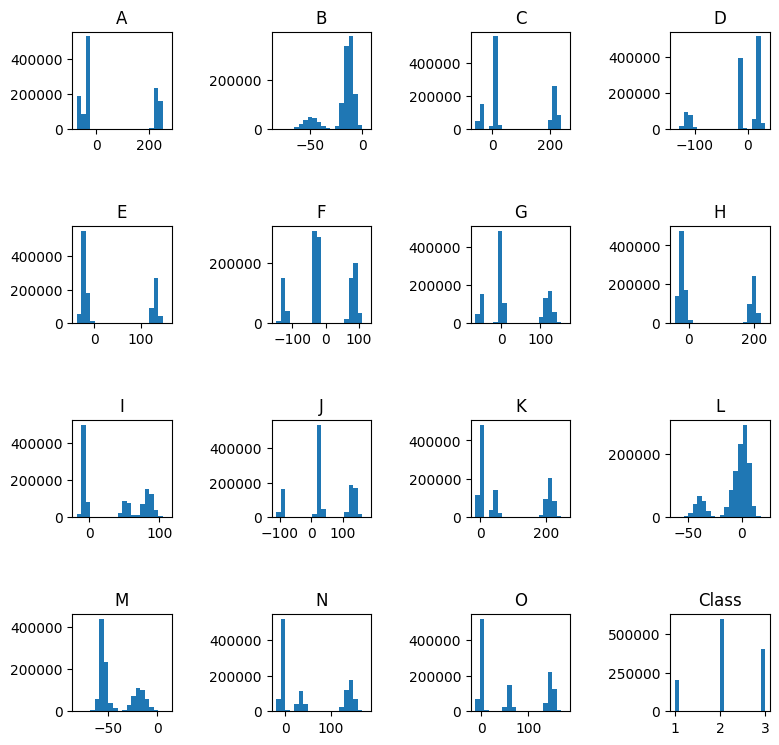

In [ ]:
fig = plt.figure() 
for i in range(1,16):
    fig.add_subplot(4,4,i)
    plt.hist(pmml_df[features[i-1:i]], bins=20)
    plt.title(features[i-1:i])
fig.add_subplot(4,4,16)
plt.hist(pmml_df['Class'], bins=20)
plt.title('Class')
fig.subplots_adjust(hspace=1, wspace=1)
fig.set_figheight(9)
fig.set_figwidth(9)

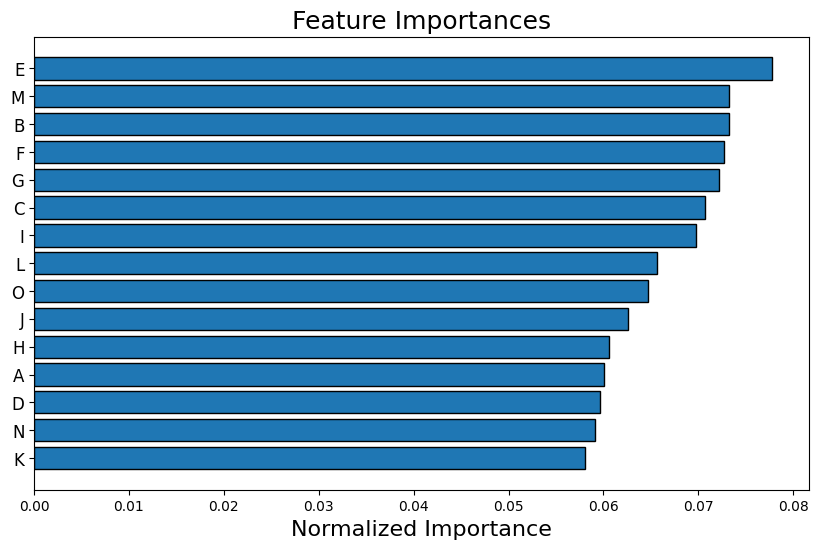

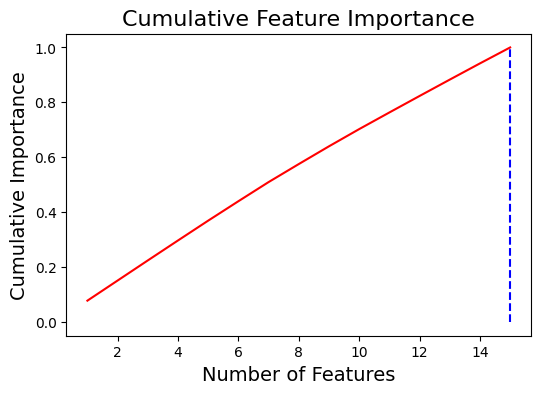

15 features required for 0.97 of cumulative importance


In [ ]:
zero_importance_features = fs.ops['zero_importance']
fs.plot_feature_importances(threshold = 0.97, plot_n = 15)

From the above plot of feature importance it is clear that all the features in the dataset have the equal importance.Dropping a feature with the high correlation or keeping the feature with high correlation gives the same accuracy.

In [ ]:
#Performing correlation for the complete dataset
pmml_df.corr('pearson')

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
A,1.000000,0.455949,0.991999,0.071330,0.990703,0.905353,0.972223,0.988807,0.818399,0.870016,0.968827,0.139619,0.958931,0.953081,0.920322,-0.000620
B,0.455949,1.000000,0.541742,0.865856,0.352946,0.760708,0.620607,0.339549,-0.098558,0.803246,0.246429,0.854635,0.345030,0.194578,0.098805,0.000138
C,0.991999,0.541742,1.000000,0.176224,0.971805,0.943482,0.988351,0.968342,0.753474,0.915784,0.937868,0.238723,0.941040,0.916578,0.873800,-0.000686
D,0.071330,0.865856,0.176224,1.000000,-0.047459,0.477183,0.279248,-0.062451,-0.502643,0.544357,-0.163679,0.949485,-0.042057,-0.217856,-0.316241,0.000150
E,0.990703,0.352946,0.971805,-0.047459,1.000000,0.849129,0.939705,0.997116,0.879142,0.805749,0.989217,0.026319,0.964769,0.979925,0.958885,-0.000649
F,0.905353,0.760708,0.943482,0.477183,0.849129,1.000000,0.969055,0.841227,0.508345,0.989868,0.781534,0.518117,0.823551,0.745156,0.675416,-0.000540
G,0.972223,0.620607,0.988351,0.279248,0.939705,0.969055,1.000000,0.934714,0.678043,0.949429,0.894114,0.335039,0.910385,0.867546,0.815281,-0.000472
H,0.988807,0.339549,0.968342,-0.062451,0.997116,0.841227,0.934714,1.000000,0.886017,0.796856,0.990875,0.012005,0.964627,0.982403,0.962873,-0.000670
I,0.818399,-0.098558,0.753474,-0.502643,0.879142,0.508345,0.678043,0.886017,1.000000,0.439881,0.926217,-0.418110,0.848801,0.943365,0.970965,-0.000766
J,0.870016,0.803246,0.915784,0.544357,0.805749,0.989868,0.949429,0.796856,0.439881,1.000000,0.730841,0.579309,0.781815,0.691273,0.615931,-0.000333


From the correlation of the total dataset features A,C,E,H,K,N have the correlation nearly 100%

In [ ]:
#Training the dataset with the features A C E H K N
labels = ['A','C','E','H','K','N']
X_total = pd.DataFrame(data=pmml_df.drop('Class', axis=1),columns=labels)
y_total = pd.DataFrame(data=pmml_df['Class'],columns=['Class'])
X_total_train, X_total_test, y_total_train, y_total_test = train_test_split(X_total,y_total,test_size=0.2)
train_total_data = pd.concat([X_total_train,y_total_train],axis=1)
train_total_data.head()

,A,C,E,H,K,N,Class
512016,230.112441,224.960377,124.450080,208.680709,206.293291,134.148450,2
1052460,-63.987924,-44.613475,-17.520819,-10.606659,50.504001,40.533964,2
914029,-37.996257,12.750275,-23.663272,-22.725101,-0.931928,-13.166034,2
29378,-34.474782,15.025885,-26.595210,-28.362149,1.302834,-8.530303,2
76450,-40.234858,14.958358,-26.016517,-26.860865,3.498730,-0.461116,3


In [ ]:
#Calculating the accuracy for the dataset considering only the best features from the correlation of total dataset
to_keep_total = ['A','C','E','H','K','N']
pipeline_total = PMMLPipeline([('mapper',DataFrameMapper([(X_total_train[to_keep_total].columns,[StandardScaler()])])),('pca',PCA(n_components=1)),('classifier',RandomForestClassifier(max_depth=2,n_estimators=10))])
pipeline_total.fit(train_total_data,train_total_data['Class'])
results = pipeline_total.predict(X_total_test)
actual = np.concatenate(y_total_test.values)
print('Accuracy:',metrics.accuracy_score(actual, results))

Accuracy: 0.49925416666666667


Performing MinMaxscaling and kbest on the entire dataset to get the best features from the dataset

In [ ]:
#Taking the complete dataset
df_class1 = pmml_df.copy(deep=True)
df_class1.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,2
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,3
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,2
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3


In [ ]:
df_class1['Class'].unique()

array([2, 3, 1])

In [ ]:
X_class123 = df_class1.drop(['Class'], axis=1)
y_class123 = df_class1['Class']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Performing MinMaxScaler
scaler = MinMaxScaler()
X_class123_scaled = scaler.fit(X_class123).transform(X_class123)
X_class123_scaled

array([[0.89073462, 0.80987235, 0.8779829 , ..., 0.72740866, 0.82026832,
        0.85913693],
       [0.10258527, 0.78723745, 0.21941259, ..., 0.24100718, 0.04457839,
        0.07310273],
       [0.09913998, 0.71626466, 0.2556253 , ..., 0.26721914, 0.07971828,
        0.0609862 ],
       ...,
       [0.86894928, 0.75106377, 0.86598024, ..., 0.72631794, 0.8528543 ,
        0.81182299],
       [0.04370846, 0.46993384, 0.05424333, ..., 0.24168541, 0.27271645,
        0.34996566],
       [0.94234337, 0.87639288, 0.86258877, ..., 0.61200446, 0.75515142,
        0.79526219]])

In [ ]:
print(X_class123_scaled[0])

[0.89073462 0.80987235 0.8779829  0.71654357 0.90861604 0.83052713
 0.8518387  0.87368383 0.78048193 0.83263085 0.87148368 0.6727923
 0.72740866 0.82026832 0.85913693]


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
#Performing KBest feature selection
fs = SelectKBest(chi2, k=5).fit_transform(X_class123_scaled, y_class123)
fs

array([[0.89073462, 0.8779829 , 0.71654357, 0.87368383, 0.78048193],
       [0.10258527, 0.21941259, 0.93923052, 0.03176728, 0.07591281],
       [0.09913998, 0.2556253 , 0.92452282, 0.06231308, 0.08937904],
       ...,
       [0.86894928, 0.86598024, 0.73817325, 0.88009701, 0.76335731],
       [0.04370846, 0.05424333, 0.08953574, 0.11858609, 0.56500229],
       [0.94234337, 0.86258877, 0.71981219, 0.86702489, 0.79852367]])

In [ ]:
print(fs[0])

[0.89073462 0.8779829  0.71654357 0.87368383 0.78048193]


After scaling the dataset using the MinMaxScalar and using the kbest for selecting the features.I am getting A , C , D , H , I features.

In [ ]:
#Training the dataset with the features A C D H I
labels = ['A','C','D','H','I']
X10 = pd.DataFrame(data=df_class1.drop('Class', axis=1),columns=labels)
y10 = pd.DataFrame(data=df_class1['Class'],columns=['Class'])
X10_train, X10_test, y10_train, y10_test = train_test_split(X10,y10,test_size=0.2)
train10_data = pd.concat([X10_train,y10_train],axis=1)
train10_data.head()

,A,C,D,H,I,Class
845083,233.731660,215.821624,-12.304190,192.338994,88.054537,3
944495,-25.174129,11.070344,15.243019,-28.600797,-8.885604,2
993722,-30.358624,11.183767,19.055807,-28.003526,-9.399976,3
204702,-38.872679,8.783887,17.836025,-18.870303,-6.800224,2
1176883,-37.594810,5.615331,23.948040,-26.408375,-9.639009,2


In [ ]:
#Calculating the accuracy for the dataset considering only the KBest features
to_keep10 = ['A','C','D','H','I']
pipeline10 = PMMLPipeline([('mapper',DataFrameMapper([(X10_train[to_keep10].columns,[StandardScaler()])])),('pca',PCA(n_components=1)),('classifier',RandomForestClassifier(max_depth=2,n_estimators=10))])
pipeline10.fit(train10_data,train10_data['Class'])
results = pipeline10.predict(X10_test)
actual = np.concatenate(y10_test.values)
print('Accuracy:',metrics.accuracy_score(actual, results))

Accuracy: 0.49964166666666665


In [ ]:
#Finding the correlation for the dataset which are containing best features
train10_data.corr()

,A,C,D,H,I,Class
A,1.000000,0.991992,0.071745,0.988791,0.818106,-0.000721
C,0.991992,1.000000,0.176698,0.968298,0.753094,-0.000771
D,0.071745,0.176698,1.000000,-0.062152,-0.502739,0.000406
H,0.988791,0.968298,-0.062152,1.000000,0.885833,-0.000776
I,0.818106,0.753094,-0.502739,0.885833,1.000000,-0.000925
Class,-0.000721,-0.000771,0.000406,-0.000776,-0.000925,1.000000


Considering the correlation for the dataset with the KBest features my assumptions are A,C,H have the correlation nearly 100% considering the correlation between the features.

**Final Model: Training and Validation**

> I have created a final pipeline with the column selector having A,C,H features which i got it from the correlation which is performed on using the KBest method



In [ ]:
final_pipeline= Pipeline(steps=[('scaler',StandardScaler()), ('pca',PCA(n_components=1)), ('classifier',DecisionTreeClassifier(max_depth=3))])
final_df_model= final_pipeline.fit(P_train, q_train)
print(final_df_model.score(P_test,q_test)) 

0.49755


**ONNX Runtime**

In [ ]:
num_featurex=15

In [ ]:
onnx_model_path='/content/drive/My Drive/AmruthamLakshmiHimaja_final_model.onnx'
in_types = [('float_input', FloatTensorType([None, num_featurex]))] 
model_onnx = convert_sklearn(final_pipeline,initial_types=in_types)
with open(onnx_model_path, "wb") as f:
    f.write(model_onnx.SerializeToString())

In [ ]:
import onnxruntime as rt
session_onnx = rt.InferenceSession(onnx_model_path)
input_name=session_onnx.get_inputs()[0].name
label_name=session_onnx.get_inputs()[0].name
predict_onnx = session_onnx.run(None, {input_name: P_test.values.astype(np.float32)})[0]
print("predict", predict_onnx)

predict [2 2 2 ... 2 2 2]


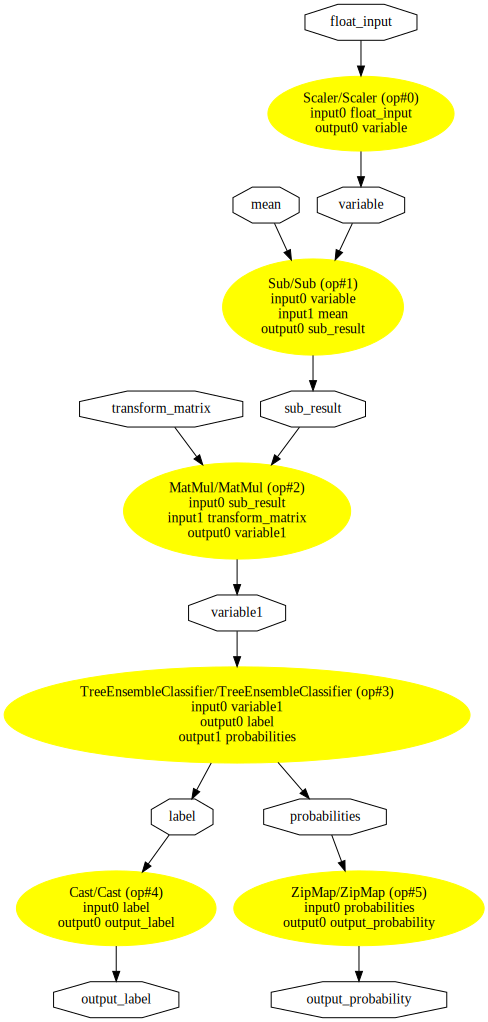

In [ ]:
py_graph = GetPydotGraph(model_onnx.graph,name=model_onnx.graph.name,rankdir="TB",node_producer=GetOpNodeProducer("docstring",color="yellow",fillcolor="yellow",style="filled"))
graphviz.Source(py_graph)

**References**



*   https://machinelearningmastery.com/handle-missing-data-python/
*   https://lukesingham.com/whos-going-to-leave-next/

*   https://github.com/WillKoehrsen/feature-selector/blob/master/feature_selector/feature_selector.py
*   https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/



